In [17]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer, fit_report
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

from itertools import product

from mixcoatl.gridFitTask import GridFitTask, DistortedGrid
from mixcoatl.sourcegrid import coordinate_distances, fit_error

camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

## Test Partial Fit (Example 1)

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (2000., -80)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.nfev)
print(result0.covar)

KeyboardInterrupt: 

In [ ]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (2020, 4170)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result0.nfev)
print(result0.covar)

## Test Partial Fit (Example 2)

4119.299386596418 2064.398919160342 -0.05425361039908663
[[ 4.48064197e-09 -1.35983423e-06 -3.12173419e-06]
 [-1.35983423e-06  3.24005734e-03  1.02703397e-03]
 [-3.12173419e-06  1.02703397e-03  3.44697659e-03]]


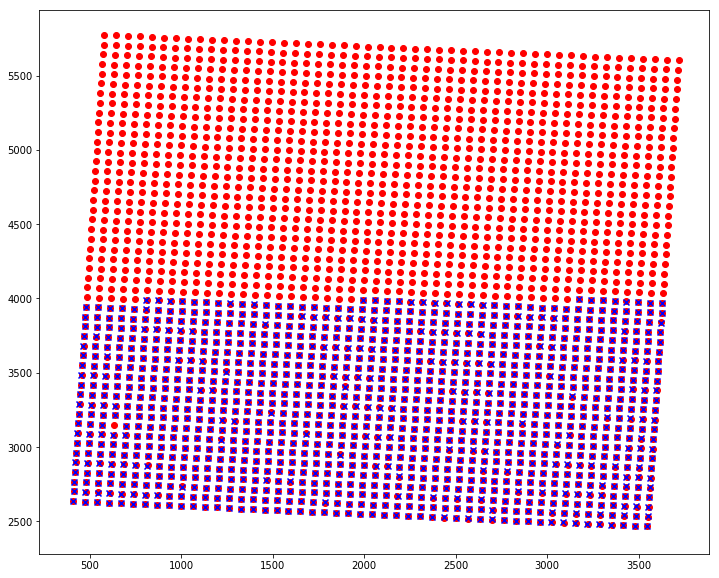

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (4100, 2050)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.nfev)
print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/R20_S12_source_catalog.cat
-106.91185346189643 2059.3397470664145 -0.05435839918389483
[[ 2.53789878e-09  3.98733968e-08  1.96321366e-06]
 [ 3.98733968e-08  2.50152129e-03 -3.12205334e-04]
 [ 1.96321366e-06 -3.12205334e-04  2.49941476e-03]]


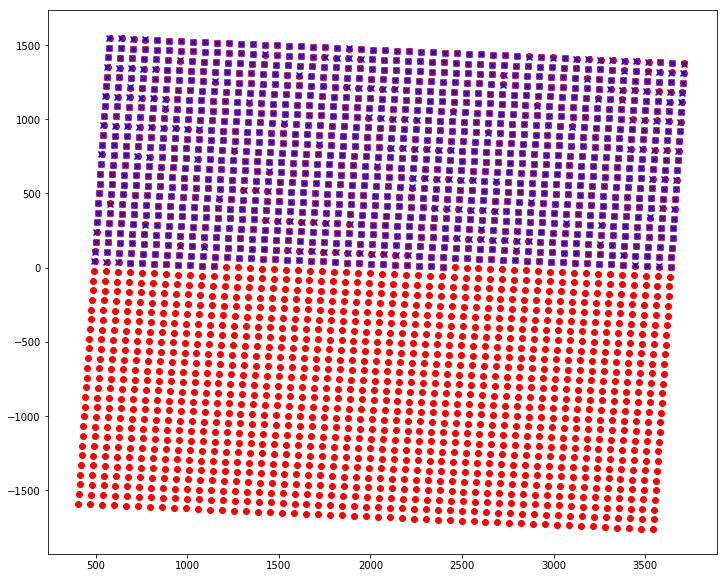

In [5]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-100, 2050)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.) \
    * (src1['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src1['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src1['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src1['base_SdssCentroid_X'] > x0_guess-70*25)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result0.nfev)
print(result0.covar)

## Test Partial Fit (Example 3)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S10_source_catalog.cat
4079.51183178741 2023.4969184237282 -0.05276916196495043
[[ 4.76373456e-09  9.82292974e-07 -2.00861506e-06]
 [ 9.82292974e-07  2.38760746e-03 -1.03051953e-04]
 [-2.00861506e-06 -1.03051953e-04  2.42685493e-03]]


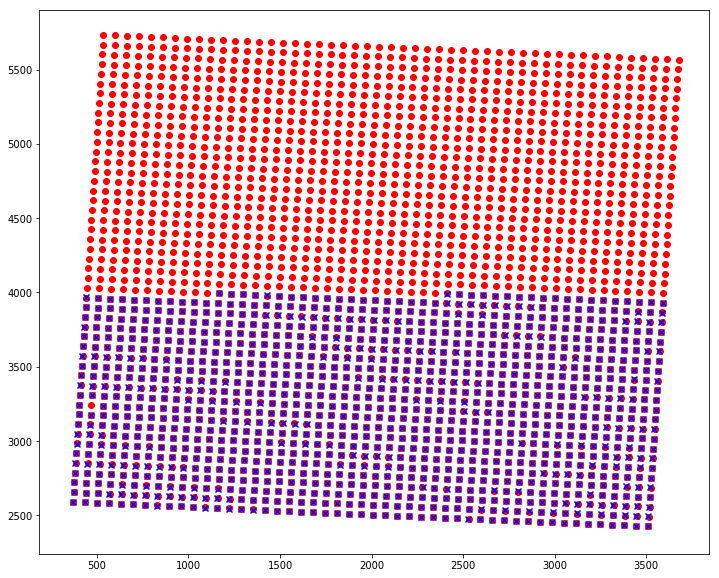

In [12]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (4079, 2023)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4079, 2023))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S20_source_catalog.cat


/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/nfs/slac/g/ki/ki19/lsst/snyder18/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


-145.64554127289134 2020.9425684477944 -0.05427385110333537
[[ 3.13573957e-09 -4.66572409e-07  2.23140523e-06]
 [-4.66572409e-07  2.57700208e-03 -5.62584817e-04]
 [ 2.23140523e-06 -5.62584817e-04  2.64604275e-03]]


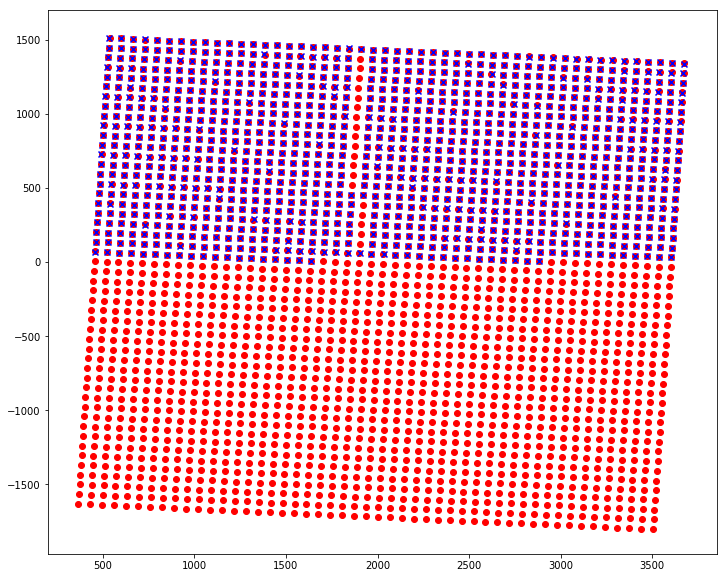

In [11]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (-140, 2030)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Test Partial Fit (Example #4)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/R12_S10_source_catalog.cat
1960.6685417273086 -92.24534858942248 -0.05343521981095721
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 15
    # data points      = 1127
    # variables        = 3
    chi-square         = 486.758123
    reduced chi-square = 0.43305883
    Akaike info crit   = -940.169674
    Bayesian info crit = -925.087730
[[Variables]]
    ystep:  65.31774 (fixed)
    xstep:  65.25701 (fixed)
    theta: -0.05343522 +/- 4.7123e-05 (0.09%) (init = -0.05350079)
    y0:     1960.66854 +/- 0.03972652 (0.00%) (init = 1959.114)
    x0:    -92.2453486 +/- 0.03044748 (0.03%) (init = -90.87617)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) = -0.758
    C(theta, x0) = -0.168
    C(y0, x0)    =  0.156


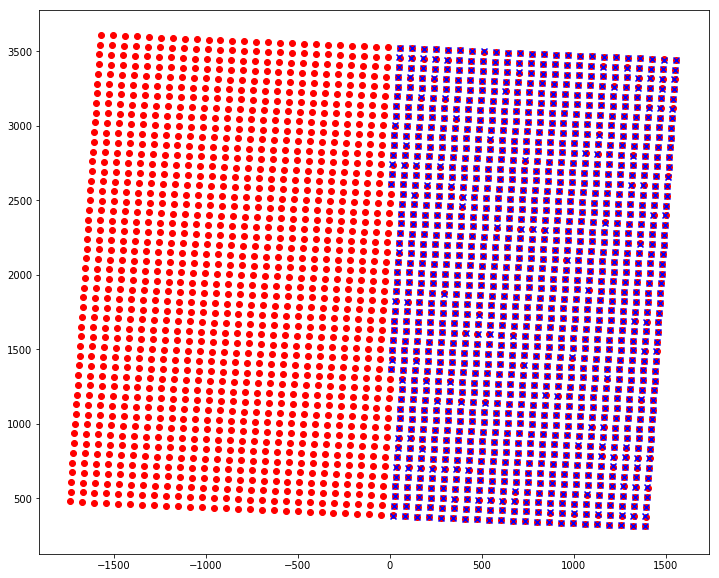

In [21]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (1970, -80)

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.) \
    * (src0['base_SdssCentroid_Y'] < y0_guess+70*25) \
    * (src0['base_SdssCentroid_Y'] > y0_guess-70*25) \
    * (src0['base_SdssCentroid_X'] < x0_guess+70*25) \
    * (src0['base_SdssCentroid_X'] > x0_guess-70*25)


src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-127.0_-21.2_003/R12_S11_source_catalog.cat
Results: y0=1962.8166673421194, x0=4130.973657284234, theta=-0.05373700152991712
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 10
    # data points      = 1171
    # variables        = 3
    chi-square         = 176.809903
    reduced chi-square = 0.15137834
    Akaike info crit   = -2207.82023
    Bayesian info crit = -2192.62339
[[Variables]]
    ystep:  65.41688 (fixed)
    xstep:  65.4482 (fixed)
    theta: -0.05373700 +/- 1.6904e-05 (0.03%) (init = -0.05377573)
    y0:     1962.81667 +/- 0.01977219 (0.00%) (init = 1962.924)
    x0:     4130.97366 +/- 0.01926974 (0.00%) (init = 4130.844)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, y0) =  0.691
    C(theta, x0) =  0.196


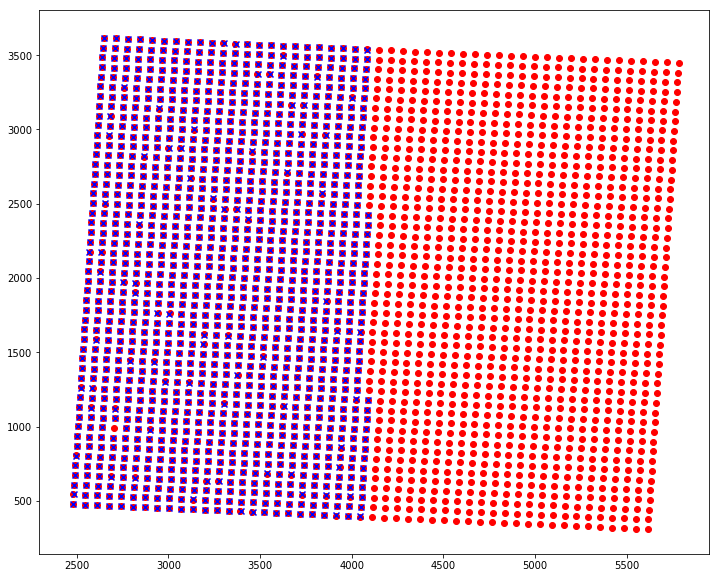

In [18]:
infile1 = infiles[1]
print(infile1)
y0_guess, x0_guess = (1962.924, 4130.844)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = False
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (y0_guess, x0_guess))
#print("Initial Guess: y0={0} x0={1}".format(y0_guess, x0_guess))
print("Results: y0={0}, x0={1}, theta={2}".format(grid1.y0, grid1.x0, grid1.theta))
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(fit_report(result1))

# Testing Fit Methods

In [22]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]
y0_guess, x0_guess = (4100, 2050)

src0 = fits.getdata(infile0)

methods = ['least_squares', 'nelder', 'lbfgsb', 'powell']

for method in methods:
    gridfit_task = GridFitTask()
    gridfit_task.config.brute_search = False
    gridfit_task.config.vary_theta = True
    gridfit_task.config.fit_method = method
    gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

    a = time.time()
    grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
    print("Method: {0}".format(method))
    print(time.time()-a)
    print(fit_report(result0))

Method: least_squares
18.12764811515808
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 17
    # data points      = 1106
    # variables        = 3
    chi-square         = 1018.91289
    reduced chi-square = 0.92376508
    Akaike info crit   = -84.7070855
    Bayesian info crit = -69.6815699
[[Variables]]
    ystep:  65.46831 (fixed)
    xstep:  65.46451 (fixed)
    theta: -0.05413440 +/- 5.9055e-05 (0.11%) (init = -0.05496729)
    y0:     4119.52720 +/- 0.05409746 (0.00%) (init = 4100)
    x0:     2064.18840 +/- 0.05409185 (0.00%) (init = 2050)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta, x0) = -0.756
    C(y0, x0)    =  0.215
Method: nelder
72.20360922813416
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 236
    # data points      = 1106
    # variables        = 3
    chi-square         = 131601.720
    reduced chi-square = 119.312529
    Akaike info crit   = 5291.60739
    Bayesian info crit

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/*.cat')
infile0 = infiles[0]
print(infile0)

y0_guess, x0_guess = (4085, 2030)

src0 = fits.getdata(infile0)

for method in methods:
    gridfit_task = GridFitTask()
    gridfit_task.config.brute_search = False
    gridfit_task.config.vary_theta = True
    gridfit_task.config.fit_method = method
    gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

    a = time.time()
    grid0, result0 = gridfit_task.run(infile0, (y0_guess, x0_guess))
    print("Method: {0}".format(method))
    print(time.time()-a)
    print(fit_report(result0))

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_21.6_-296.1_010/R20_S10_source_catalog.cat
Method: least_squares
12.230649948120117
4079.4154173859583 2023.7358043260465 -0.05285328296621857
`xtol` termination condition is satisfied.
[[ 8.51988992e-09  1.18137110e-06 -2.87181473e-06]
 [ 1.18137110e-06  2.54419594e-03 -1.73876292e-04]
 [-2.87181473e-06 -1.73876292e-04  2.64295562e-03]]
Method: nelder
73.16998648643494
4079.2918922641543 2023.1800352472408 -0.05260947208952682
Optimization terminated successfully.
[[ 7.60860468e-10  1.11315727e-08 -6.43618426e-07]
 [ 1.11315727e-08  7.96275403e-04 -9.41629324e-06]
 [-6.43618426e-07 -9.41629324e-06  1.34055639e-03]]
Method: lbfgsb
21.767178773880005
4079.29194147544 2023.180190034938 -0.05260946994873951
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
[[ 7.60859134e-10  1.11315447e-08 -6.43615702e-07]
 [ 1.11315447e-08  7.96274876e-04 -9.41624626e-06]
 [-6.43615702e-07 -9.41624626e-06  1.34055074e-03]]
Method: pow

## Make Optic Distortions

In [ ]:
old_infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/raw_data/*.fits')

xstep = np.zeros(len(old_infiles))
ystep = np.zeros(len(old_infiles))
theta = np.zeros(len(old_infiles))

for i, infile in enumerate(old_infiles):

    with fits.open(infile) as hdul:
        ## Read input file
        hdul = fits.open(infile)
        grid_dy = hdul[1].header['DY']
        grid_dx = hdul[1].header['DX']
        grid_theta = hdul[1].header['THETA']
        
        xstep[i] = grid_dx
        ystep[i] = grid_dy
        theta[i] = grid_theta
        
mean_xstep = np.mean(xstep)
mean_ystep = np.mean(ystep)
mean_theta = np.mean(theta)

print(mean_xstep, mean_ystep, mean_theta)

In [ ]:
## Get old optic distortion file
hdul = fits.open('corrected_grid_pt_average_displacement.fits')

dx = hdul[0].data[:, 0]
dy = hdul[0].data[:, 1]

centroid_shifts = (dy, dx)

optics_grid = DistortedGrid(mean_ystep, mean_xstep, mean_theta, 0, 0, 49, 49)
optics_grid.add_centroid_shifts((dy, dx))
#optics_grid.write_fits('optics_distorted_grid.fits', overwrite=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()

ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

In [ ]:
## Rotate by 45 degrees
optics_grid.theta += np.pi/4

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)